# Linear Regression
## Bike Sharing Assignment
#### Problem Statement:

- To identify the variables affecting demand for shared bikes in American Market

- To know Which variables are significant in predicting the demand for shared bikes.

- To know the accuracy of the model, i.e. how well these variables can predict demand.
- To know the priority of the variables(i.e) influence the demand

# Steps for acheving above statements:
    - Reading,understanding and visualising the data
    - Preparing the data for modelling (train-set split,rescaling etc.)
    - Training the model
    - Residual analysis
    - Predictions and evaluation on the test set

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
## Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [3]:
bike = pd.read_csv('day.csv') ## Importing data set into bike variable

In [4]:
bike.head() # Display the top 5 records for the datframe using head() function

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape # Shape of data frame (no of rows & cols)

(730, 16)

In [6]:
bike.info() ## Info of dataset , column data types and non- null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.isnull().sum() ### Looking for any null values present in given data set

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike.describe() ## getting statistical information about dataset

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping columns which are irrelavant for model building

Dropping instant, dteday,casual,registered

- 1) Instant - it is necessary to drop the variable becuase it is unique identifier of row and not required for regression
- 2) Dteday - It is a redundant variable as we could see we have yr,mnth explains 
- 3) Casual & Registered - these variables are target variables and they are not available all the time. Also we have given one more target variable where we can get combination of casual & regisrtered as cnt. So it is necessary to drop these variables as well

In [9]:
not_req = ['instant','dteday','casual','registered']

bike = bike.drop(not_req,axis=1)

In [10]:
bike.shape ## checking whether changes are implemented

(730, 12)

In [11]:
bike.head()  ## Its always good practise to inspect dataframe 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Before Starting anything lets visual; the data, By seeing data we could see there are some categorical variables mentioned with int data types and some numerical varariables

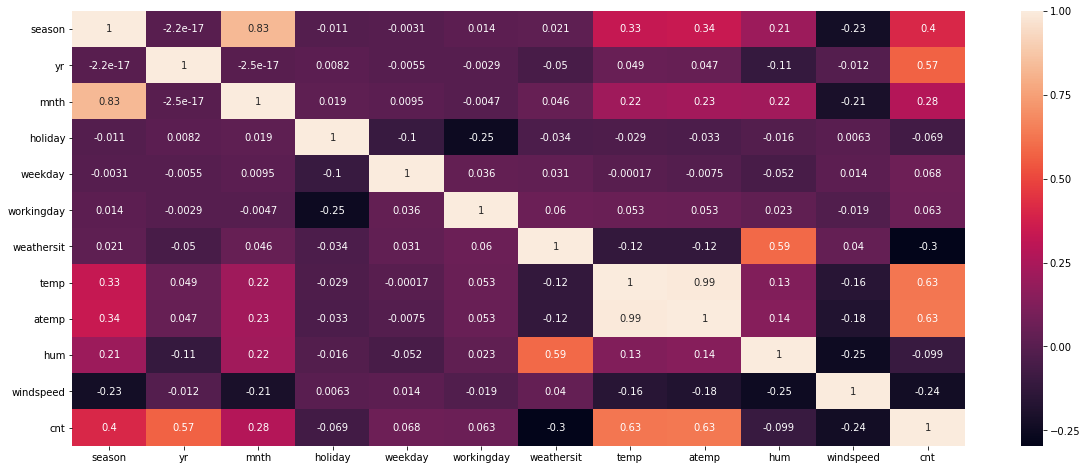

In [12]:
## Correlation between variables
## Heat map is one of best way of visualizing correlation between variables

plt.figure(figsize=(20,8))
ax = sns.heatmap(bike.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()



In [13]:
## nunique is the function in python which helps to give some idea about the columns whether they are categorical or not

bike.nunique()
bike.nunique().sort_values(ascending= True)

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

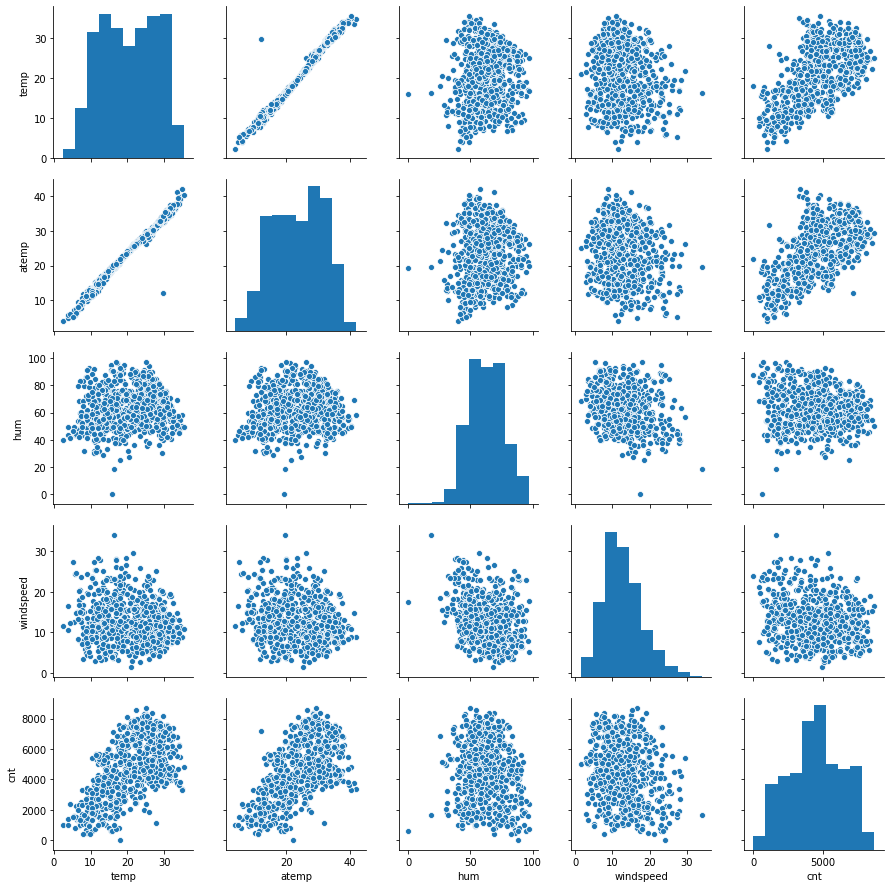

In [14]:
## By seeing above info we can have some idea the cols [temp,hum,windspeed,atemp,cnt] are definetly numerical columns
## The possible best way to visualize numerical columns is pair plot

sns.pairplot(data=bike,vars=['temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()


### As per above visual we could see temp and atemp variables are highly correlated. To Avoid the multicollinearity it is better to drop one of these variables. Hence dropping atemp 

In [15]:
bike = bike.drop(['atemp'],axis =1) ## Using drop function and we need column so axis = 1

In [16]:
bike.shape  ## Shape of data frame after atemp variable is removed

(730, 11)

In [17]:
co = bike[['temp', 'hum','windspeed','cnt']].corr()  ## calculating correlation again for numeric columns
co

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


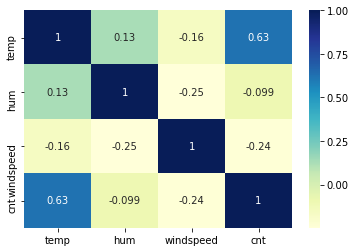

In [18]:
## Visualizing corr() using heat map for best representation

ax = sns.heatmap(co,annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Lets visualize categorical columns in the data frame.
    - As we could see there are categorical columns by above info using nunique function. 
    - To visualize the categories lets use box plot using subplot for all categorical columns

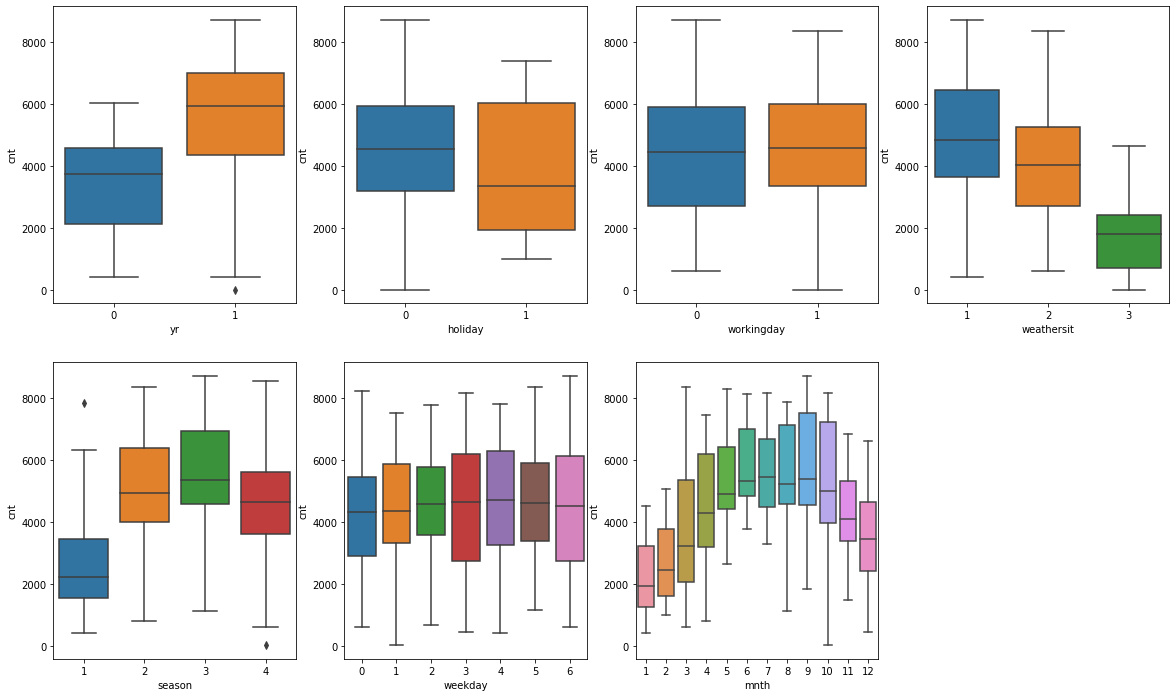

In [19]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

### Inferences:
    - Defintely we could see in the year 2019, cnt values increased means shared bike count increased when compared to year 2018 
    - Also we could see in the weather sit where 1 - represent clear have highest cnt value which means the shared bikes is pretty high in clear when compared to other weather condition.
    - For the season spring has outlier of 8000 count how ever in the season 3 which is fall as per data dictionary has highest usage of bikes
    - The cnt value is less during holidays
    - In the month graph, except oct all the months never started with 0 which means atleast there are few usages where as in the oct month it has no bookings on someday however it has descent number of bookings when compared to other months

### We can also visualise these category columns by using hue as holiday

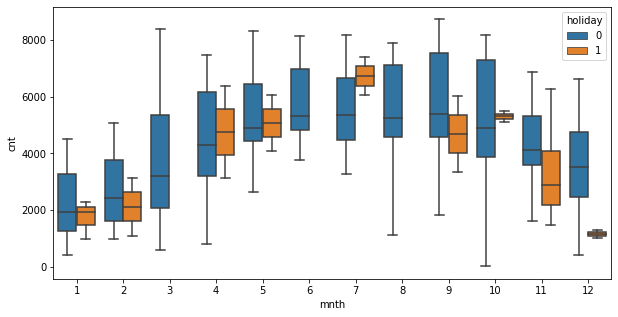

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

-  <font color = blue>`By using above group we found some interesting insghts that in the month of March & August there is no cnt values on holidays`</font>

## Step 2: Data Preparation for model building
    - Converting some category columns into categories
    - Also for regression we need only numeric columns so if we have any of these we need to handle them

In [21]:
bike.shape
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [22]:
bike.nunique().sort_values(ascending=True)

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [23]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Even though data dict provides 4 types of weather sit we have only 3 unique types in the dataset by above info

#### By above info of nunique function we could convert categorical variables to corresponding category

- 1) season : It has 4 count and can map as (1 - Spring,2 - Summer,3-Fall,4-Winter)
- 2) yr : No need to modify as it is binary categorical variable
- 3) mnth : It has 12 Count and can map as (1- Jan to 12 -Dec)
- 4) holiday, workingday : No need to modify as it is binary categorical variable
- 5) Weekday : it has 7 count can be mapped as (sun - 0 to sat 6)
- 6) Weathersit : it has 3 unique count can be mapped as (1 - Clear , 2 - Mist & Cloud, 3 - Light Rain & Snoq 4 - Heavy Rain & Snow

In [24]:
## Converting the required categorical colums into categories by using map function and for month using calendar function to extract month 
bike.season = bike.season.map({1: 'spring',2:'summer',3:'fall',4:'winter'})
bike['mnth'] = bike['mnth'].apply(lambda x:calendar.month_name[x])   
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Rain & Snow',4:'Heavy Rain & Snow'})

In [25]:
## Inspect the data frame whether changes has been reflected or not
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [26]:
## Lets look the info of dataframe for data types etc
bike.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Creating Dummy variables for the categorical columns which just now created above

In [27]:
cat_cols = ['season','mnth','weekday','weathersit']

cat_df = bike[cat_cols]
cat_df

,season,mnth,weekday,weathersit
0,spring,January,Saturday,Mist & Cloudy
1,spring,January,Sunday,Mist & Cloudy
2,spring,January,Monday,Clear
3,spring,January,Tuesday,Clear
4,spring,January,Wednesday,Clear
...,...,...,...,...
725,spring,December,Thursday,Mist & Cloudy
726,spring,December,Friday,Mist & Cloudy
727,spring,December,Saturday,Mist & Cloudy
728,spring,December,Sunday,Clear


`In pandas we have function called get dummies to get dummies  of respective columns and by default it will also include the first set, but to avoid redundancy and multi collinearity
it is necessary to drop first set`

In [28]:
cat_df = pd.get_dummies(cat_df,drop_first=True) ## We are creating a seperated dataframe for all dummy variables

In [29]:
cat_df.head() ## Inspecting top 5 rows for results 

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
## Merging cat_df dataframe with bike

bike = pd.concat([bike,cat_df],axis = 1)    ### Now that we concat the dummy variables data frame with our original df bike to use of them


In [31]:
bike.shape  ## Geeting shape whether they were added to data frame or not

(730, 33)

In [32]:
bike.head() ## Checking few rows of data frame

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [33]:
pd.set_option('display.max_columns',50)  ## By Default the pandas allowed max 30 cols Hence pd.set_option is used

In [34]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
## To avoid reduncy we will drop the variables for which dummy variables are created

bike = bike.drop(cat_cols,axis = 1) 


In [36]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
bike.shape

(730, 29)

### Now we have prepared data for regression techniques such as (splitting data,model building etc.,)

### Step 4 : Split the data set into training and test

In [38]:
## Importing required libraries for Linear regression 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
np.random.seed(0)    ## Random seed is function in numpy to select random from our dataset
## By using train split menthod we are diving the given data set into training and test in the size of 70%:30% ratio
bike_train,bike_test=train_test_split(bike, train_size = 0.7, random_state = 100)  

In [40]:
bike_train.shape ## Shape of training set after split 

(510, 29)

In [41]:
bike_test.shape ## Shape of test set after split

(220, 29)

In [42]:
bike_train.head()  ## Inspecting data for train set

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
num_cols = ['temp','hum','windspeed','cnt']   ## Creating list of numeric columns which requires scaling

#### Scaling is a feature in regression which is very helpful for good interpretation. As we could see the numeric columns there are some numeric coulumns like cnt, hum have different scales with each other. To interpret the coefficient in model it would be difficult, so if we scale them by using scaling techniques it would be very easy to interpret coeff.

`Using MinMax Scaling technique which is also normalization technique to get all the results of columns in between 0 and 1 where highest value in column is 1 and lowest is 0`

In [44]:
scaler = MinMaxScaler()  ## Creating MinMaxScaler object 
bike_train[num_cols] = scaler.fit_transform(bike_train[num_cols]) ## We are fiiting scaler on data set and also transforming results into dataset

In [45]:
bike_train.head() ## Inspecting data frame

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
bike_train.describe()  ## After scaling it is good to use describe function because describe will give min max of entries in the columns apart from mean,median,count

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


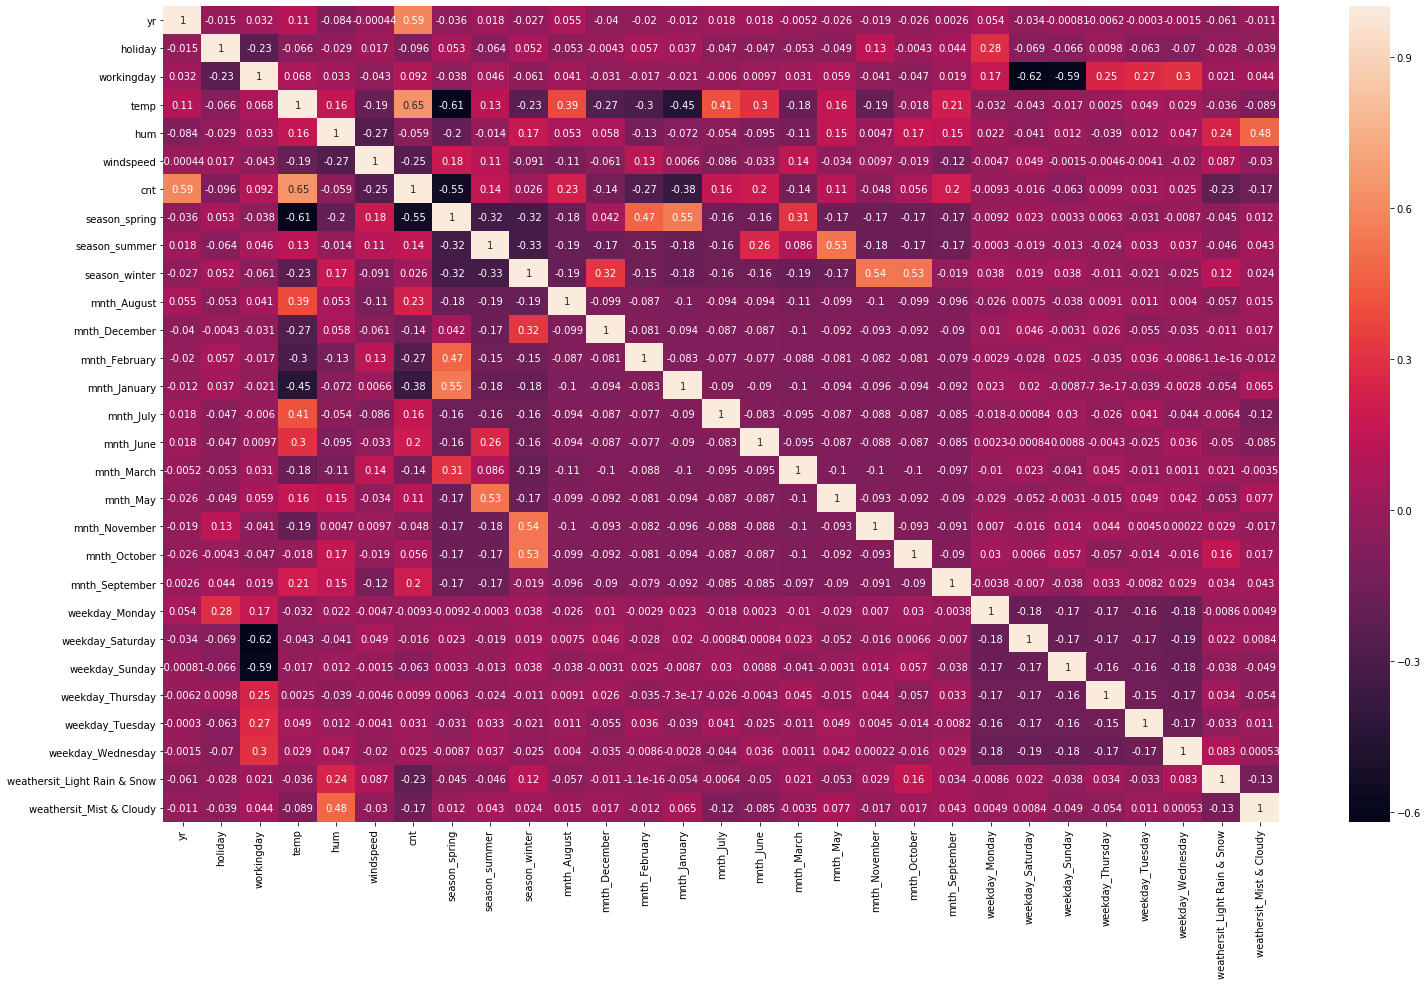

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated on training data set 

plt.figure(figsize=(25,15))
ax = sns.heatmap(bike_train.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

_"By Above heat map we could see temp variable is highly correlated with cnt variable. So lets visulize that particular alone"_

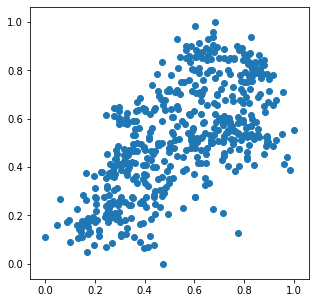

In [48]:
plt.figure(figsize=[5,5])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

## To predict some more varibles or derieve fractors lets build Model building using RFE

In [49]:
y_train = bike_train.pop('cnt')  ## Dividing data set into X variable and y varibles where X Variables are independent variables and y is dependent variable
X_train = bike_train

In [50]:
lm = LinearRegression()   ## Creating Linear regression object 
lm.fit(X_train, y_train) ### Fit the model on data set 

rfe = RFE(lm, 12)             # running RFE of top 12 variables which we will select 
rfe = rfe.fit(X_train, y_train) ## Fit it 

In [51]:
## Rfe has two function which makes our job earier is support function to give bool values true or false for consideration and ranking on priority wise
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', False, 6),
 ('mnth_February', False, 7),
 ('mnth_January', False, 4),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_March', False, 17),
 ('mnth_May', False, 8),
 ('mnth_November', False, 5),
 ('mnth_October', False, 15),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 10),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Rain & Snow', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [52]:
## Now that we have columns needs to be considered for model building
col = X_train.columns[rfe.support_] ## Extracting column names from data set 
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September',
       'weathersit_Light Rain & Snow', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [53]:
X_train_rfe = X_train[col]  ## Creating another data frame with selected columns

In [54]:
X_train_rfe.head() ## Inspecting data frame of top 5 rows

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_September,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,1


In [55]:
## We need to add constant because it fits a regression line passing through the origin, by default.in statsmodel 
X_train_rfe = sm.add_constant(X_train_rfe)  ## Adding constant

In [56]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()  ## Using ordinary Least squared is the best method for linear building for models
lm1.params

const                           0.284754
yr                              0.229357
holiday                        -0.096878
temp                            0.529863
hum                            -0.172595
windspeed                      -0.182190
season_spring                  -0.056371
season_summer                   0.053078
season_winter                   0.097610
mnth_July                      -0.057247
mnth_September                  0.083251
weathersit_Light Rain & Snow   -0.236920
weathersit_Mist & Cloudy       -0.052653
dtype: float64

In [57]:
print(lm1.summary()) ## Printing summary of model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.95e-190
Time:                        00:26:11   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### By above summary information we could see R-Squared and adjusted R-Squared are almost similar and F-Stat is almost zero and p values for atleast 11 variables shows statistically significant

#### How ever we will use variance inflaction factor to determine how much the variables are correlated with each other

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
6,season_spring,5.02
3,temp,3.61
8,season_winter,3.48
7,season_summer,2.62
4,hum,1.89
12,weathersit_Mist & Cloudy,1.56
9,mnth_July,1.48
10,mnth_September,1.30
11,weathersit_Light Rain & Snow,1.24


`We can observer constant has VIF but however constant needs to be removed from VIF calculation`

In [59]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [60]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.33
6,season_summer,2.79
11,weathersit_Mist & Cloudy,2.28
0,yr,2.08
8,mnth_July,1.58
9,mnth_September,1.38


`From above table we can see hum variable has high VIF we will drop this variable`

In [61]:
X_train_new1 = X_train_rfe.drop(["hum"], axis = 1) ## Dropping the hum column and adding to new dataframe

In [62]:
X_train_new1 = sm.add_constant(X_train_new1) ## Adding constant to df

In [63]:
lm2 = sm.OLS(y_train,X_train_new1).fit() ## model build again

In [64]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.06e-187
Time:                        00:26:27   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1994      0.030      6.746      0.000       0.141       0.258
yr                               0.2336      0.008     28.352      0.000       0.217       0.250
holiday                         -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                             0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                       -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring                   -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer                    0.0465      0.015      3.051      0.002       0.017       0.076
season_winter                    0.0817      0.017      4.730      0.000       0.048       0.116
mnth_July                       -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_September                   0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Light Rain & Snow    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist & Cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`As per above summary of lm2, there is no drastic change in R and adjusted R2 square and also p value also can infer <=0.05 which are statistically significant`

#### Let's caluculate VIF again to look after results

In [65]:
X_train_new1 = X_train_new1.drop(['const'], axis=1)

In [66]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.78
7,mnth_July,1.58
10,weathersit_Mist & Cloudy,1.55
8,mnth_September,1.34
9,weathersit_Light Rain & Snow,1.08


- As per above info we could see VIF has reduced has reduced drastically after dropping hum column . Now lets remove one more column to improve model. Selection of mnth_July has 0.05 p value -

In [67]:
X_train_new2 = X_train_new1.drop(["mnth_July"], axis = 1)

In [68]:
X_train_new2 = sm.add_constant(X_train_new2) ## Adding constant

In [69]:
lm3 = sm.OLS(y_train,X_train_new2).fit()   ## Building model again

In [70]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.47e-186
Time:                        00:27:02   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1909      0.030      6.447      0.000       0.133       0.249
yr                               0.2341      0.008     28.237      0.000       0.218       0.250
holiday                         -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                             0.4777      0.033     14.423      0.000       0.413       0.543
windspeed                       -0.1481      0.025     -5.854      0.000      -0.198      -0.098
season_spring                   -0.0554      0.021     -2.654      0.008      -0.096      -0.014
season_summer                    0.0621      0.014      4.350      0.000       0.034       0.090
season_winter                    0.0945      0.017      5.630      0.000       0.062       0.127
mnth_September                   0.0910      0.016      5.566      0.000       0.059       0.123
weathersit_Light Rain & Snow    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
weathersit_Mist & Cloudy        -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`From above info the pvalue is 0.08 for season . Before that we could see VIF values` 

In [71]:
X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [72]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_Mist & Cloudy,1.55
7,mnth_September,1.23
8,weathersit_Light Rain & Snow,1.08
1,holiday,1.04


`Now the VIF has below 5 which is acceptable and for season_spring it has 0.008 value so lets improve model furthur`

In [73]:
X_train_new3 = X_train_new2.drop(["season_spring"], axis = 1)

In [74]:
X_train_new3 = sm.add_constant(X_train_new3)

In [75]:
lm4 = sm.OLS(y_train,X_train_new3).fit()


In [76]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.83e-186
Time:                        00:27:13   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1259      0.017      7.508      0.000       0.093       0.159
yr                               0.2329      0.008     27.962      0.000       0.216       0.249
holiday                         -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                             0.5480      0.020     27.360      0.000       0.509       0.587
windspeed                       -0.1532      0.025     -6.039      0.000      -0.203      -0.103
season_summer                    0.0881      0.010      8.437      0.000       0.068       0.109
season_winter                    0.1293      0.011     12.314      0.000       0.109       0.150
mnth_September                   0.1012      0.016      6.330      0.000       0.070       0.133
weathersit_Light Rain & Snow    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
weathersit_Mist & Cloudy        -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
X_train_new3 = X_train_new3.drop(['const'], axis=1)

In [78]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_summer,1.57
8,weathersit_Mist & Cloudy,1.48
5,season_winter,1.37
6,mnth_September,1.20
7,weathersit_Light Rain & Snow,1.08
1,holiday,1.04


# Interference: 
    - Now that we have our final model which has 83 for r2 squared which is pretty good model
    - Also the adjusted and normal R2 square are almost similar which is acceptable
    - The F-Stat metric is again good
    - ALl the pvalues have 0 values which is strongly say that variables are statistically significant 
    - Also the VIF for all predictors are less than 5 

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [79]:
X_train_new3.shape ## Shape of final model df
X_train_new3 = sm.add_constant(X_train_new3) ##  Adding constant variable

In [80]:
y_train_cnt = lm4.predict(X_train_new3)

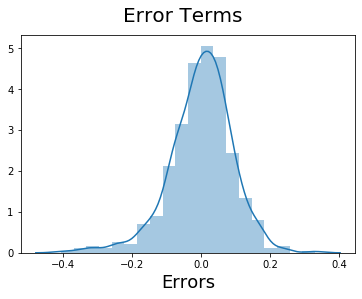

In [81]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms and it is normally distributed
it's time to go ahead and make predictions using the final, i.e. fourth model.

### Lets perform same operations on test data set like scaling and make predictions

In [82]:
bike_test[num_cols] = scaler.transform(bike_test[num_cols]) ## Instead of fit_tranform we will only transform on test data set because its already fitted on train set

In [83]:
bike_test.describe() ## Describe function to see the values again

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
## Dividing data set into X and y variables 
y_test = bike_test.pop('cnt') 
X_test = bike_test

In [86]:
X_test = sm.add_constant(X_test) ## Adding the constant 

In [87]:
X_test.columns  ## Getting test columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Rain & Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [88]:
X_train_new3.columns ## Getting final model training data set columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_September', 'weathersit_Light Rain & Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [89]:
X_train_new3 = X_train_new3.drop(['const'], axis=1) ## Dropping the constant columns

In [90]:
X_train_new3.columns ## Getting columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_September', 'weathersit_Light Rain & Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [91]:
X_test = X_test[X_train_new3.columns] ## Modifying test data set with same columns as train set

In [92]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_September', 'weathersit_Light Rain & Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [93]:
X_train_new3.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_September', 'weathersit_Light Rain & Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [94]:
X_test = sm.add_constant(X_test) ## Adding constant

In [95]:
X_test.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_September,weathersit_Light Rain & Snow,weathersit_Mist & Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


#### Predicting values

In [96]:
y_pred = lm4.predict(X_test) 

In [97]:
y_pred

184    0.391783
535    0.917258
299    0.406241
221    0.557025
152    0.579506
         ...   
702    0.729245
127    0.523746
640    0.810364
72     0.276449
653    0.721458
Length: 220, dtype: float64

### Getting r2_square for data set

In [98]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
r2_score(y_true= y_test ,y_pred=y_pred)

0.7941977535477242

In [99]:
print('R-Sqaured',round(r2_score(y_test, y_pred),2))
print('MSE',round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
print('Mean Absolute Error',mean_absolute_error(y_test, y_pred))

R-Sqaured 0.79
MSE 0.0992
Mean Absolute Error 0.075773967120758


### Notes: Now we can observe the difference between training set r squared and above r2_square is less than 5 % which is in acceptable range

## Step 9: Model Evaluation

Let's now plot the graph for actual vs predicted values.

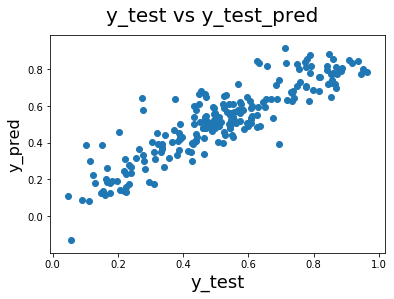

In [100]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### Getting priorities of precictors which influence for demand

In [101]:
param = pd.DataFrame(lm4.params)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param.insert(0,'Variables',param.index)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param.set_index('Variables',inplace = True)
param

,Coefficient value
Variables,
temp,0.548008
yr,0.232861
season_winter,0.129345
const,0.125926
mnth_September,0.101195
season_summer,0.088080
weathersit_Mist & Cloudy,-0.078375
holiday,-0.098685
windspeed,-0.153246


We can see that the equation of our best fitted line is:

$ cnt = 0.125926 + 0.548008  X  temp + 0.232861  X  yr + 0.129345 X season_Winter + 0.101195 X mnth_September + 0.088080 X season_summer -0.078375 X  weathersit_Mist & Cloudy -0.098685 X holiday  -0.153246 X windspeed -0.282869 X weathersit_Light Rain & Snow $

In [102]:
r2_score(y_true= y_test ,y_pred=y_pred)

0.7941977535477242

Inferences :
- 1) First of all positive sign indicates that increases in cnt variable and negativve sign indicates it has decrease 
- 2) The positive signed variables or predictors are temp as top followed by yr,season_winter
- 3) Negative signed variables or predictors are weathersit_Light Rain & Snow followed by windspeed
      
What we can interpreted:
   - Temp is top variable and influence the count of shared bike increase. It indicates that when there is unit increase in temp, the output cnt is estimated to increase by 0.54 units, keeping all the other attributes constant.
   - yr coefficient is 0.2328. It indicates that the year 2019 was favoring the target variable cnt.
   - And Weather and windspeed are influencing decrease in demand for bikes that means not favorable for bike rentals
   
#### To Summarize, Business is growing Year over year and tempearture plays major role in bike rentals. Season and Weather seems to be good predictors of how bike sharing is happening. Also, during holidays bike sharing is less. 
      